<h1>TP sur Lasso et Ridge - Régularisation<h1>

## Chargeons le jeu de données

In [9]:
import pandas as pd
import numpy as np
raw_data = pd.read_csv('TP_1_prostate_dataset.txt', delimiter='\t')
raw_data.head()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [ ]:
On récupère nos variables explicatives pour la régression, qu'on place dans une matrice X et notre variable expliquée y à part. On ne récupère pas la dernière colonne du dataset qui est un booléen associé à la présence du cancer, car on ne traite pas les variables discrètes dans ce TP - il nous sera utile pour le TP classification en revanche 

In [10]:
X_train = raw_data.iloc[:60,1:-3]
y_train = raw_data.iloc[:60,-2]
X_test = raw_data.iloc[60:,1:-3]
y_test = raw_data.iloc[60:,-2]

Ok on peut maintenant effectuer nos régressions ! 💪

<h2>La baseline : une régression classique

In [21]:
from sklearn import linear_model
import numpy as np

# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train,y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)

print(baseline_error)

2.864149965701438


## Application de la régression ridge

Comme vu dans le chapitre sur la régression ridge, on doit trouver un coefficient de régularisation adapté. Pour rappel, l'objectif est de biaiser un peu la prédiction, afin de diminuer l'erreur standard. 

In [22]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

On peut maintenant tester toute les régressions ridges avec les différentes valeur de l'hyperparamètre α . On récupère les poids des différents coefficients de la régression associées ainsi que l'erreur quadratique.

In [23]:
from sklearn.linear_model import Ridge 

In [24]:
ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])

On peut afficher l'évolution de la valeur des différents poids associés aux paramètres

In [25]:
import matplotlib.pyplot as plt

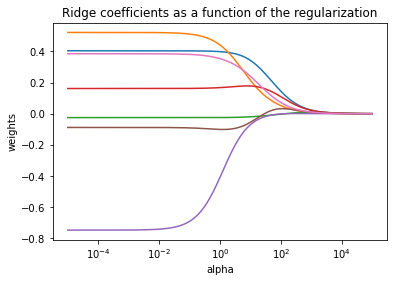

In [26]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Comme on peut le voir (et comme c'était prévu), la valeur de alpha diminue les poids de tous les paramètres de la régression. Etudions maintenant la valeur de l'erreur quadratique

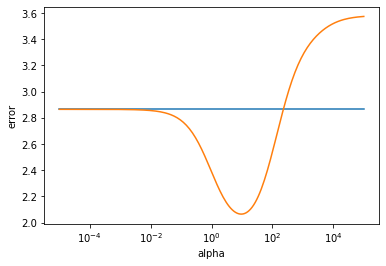

In [28]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

Comme on peut le voir, la régularisation diminue l'erreur sur le jeu de données test. Pour la régression ridge, le minimum semble se trouver vers alpha=10. On peut récupérer la valeur minimum:

In [29]:
min(errors)

[2.864149965701438, 2.0648270607950225]

## Application du Lasso

On teste aussi un certain nombre d'hyperparamètres pour appliquer le lasso

In [31]:
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

On peut maintenant afficher les résultats

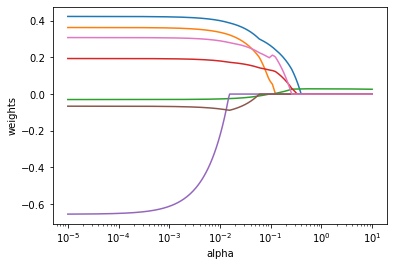

In [32]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

Comme on peut le voir, le lasso permet de supprimer des variables en mettant leur poids à zéro. C'est le cas si deux variables sont corrélées. L'une sera sélectionnée par le Lasso, l'autre supprimée. C'est aussi son avantage par rapport à une régression ridge qui ne fera pas de sélection de variables.

On peut observer maintenant le comportement de l'erreur.

In [33]:
min(errors)

[2.864149965701438, 1.853156120172834]

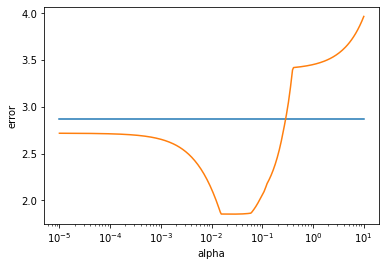

In [34]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

<h1>Conclusion

Avec ce TP vous avez pu mettre en oeuvre de manière pratique la régression ridge et le lasso. La régularisation fonctionne bien dans les deux cas, et permet de réduire l'erreur totale du modèle à l'aide de l'ajout du biais qui quantifie la complexité. L'un diminue grandement l'influence de certaines variables sur le modèle tandis que l'autre peut directement les supprimer (mettre leur poids à zéro), et donc être parcimonieux.